In [1]:
! pip install librosa

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 1. Installing and Importing Required Libraries
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import os

In [3]:
# 2. Defining Emotions
emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

In [4]:
# 3. Feature Extraction Function
def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    
    # MFCC (Mel-frequency cepstral coefficients)
    mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13).T, axis=0)
    
    # Chromagram
    chroma = np.mean(librosa.feature.chroma_stft(y=audio, sr=sample_rate).T, axis=0)
    
    # Mel Spectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=audio, sr=sample_rate).T, axis=0)
    
    # Spectral Contrast
    contrast = np.mean(librosa.feature.spectral_contrast(y=audio, sr=sample_rate).T, axis=0)
    
    # Tonnetz
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(audio), sr=sample_rate).T, axis=0)
    
    return np.hstack([mfccs, chroma, mel, contrast, tonnetz])

In [5]:
! pip install resampy


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import resampy

In [7]:
# 4. Loading Dataset and Extracting Features
data_path = "./speech-emotion-recognition-ravdess-data"
features = []
labels = []

for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith('.wav'):
            file_path = os.path.join(root, file)
            # Extract features
            features.append(extract_features(file_path))
            # Extract emotion from filename
            emotion = file.split('-')[2]
            labels.append(emotions[emotion])

# Converting to numpy arrays
X = np.array(features)
y = np.array(labels)

C:\Users\kunja\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1012
  warnings.warn(


In [8]:
print(y)

['neutral' 'neutral' 'neutral' ... 'surprised' 'surprised' 'surprised']


In [9]:
! pip install imblearn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# 5. Balancing the Dataset (optional, depending on your dataset)
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X, y)

In [11]:
# 6. Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [12]:
# 7. Encoding Labels and Standardizing Features
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
print(y_train)
print(X_train)

[1 6 6 ... 6 5 2]
[[-0.5965419   1.41925995  0.75832418 ... -0.48136882  0.62793072
   0.79220947]
 [-0.61214695 -0.23704431  0.60105982 ...  1.15782269 -1.32971037
  -0.75974447]
 [-0.73651776  0.17135295 -0.10282873 ...  1.13589023 -0.04821235
   1.19367983]
 ...
 [-0.24035174  1.06640065  0.48606058 ... -0.64882918  2.15123319
   0.72722316]
 [ 0.05221279  0.65214256  1.13402861 ...  0.73765257 -1.33377166
  -1.17520531]
 [-0.09657297  1.04152214  1.02701217 ...  0.772345   -0.34481816
   0.18043419]]


In [14]:
# 8. Building the MLP Model
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, alpha=0.01, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(128, 64), max_iter=300,
              random_state=42)

In [15]:
# 9. Fine-Tuning Hyperparameters (RandomizedSearchCV)
param_dist = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (256, 128)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=10, cv=3, random_state=42)
random_search.fit(X_train, y_train)

C:\Users\kunja\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kunja\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kunja\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kunja\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.wa

RandomizedSearchCV(cv=3,
                   estimator=MLPClassifier(alpha=0.01,
                                           hidden_layer_sizes=(128, 64),
                                           max_iter=300, random_state=42),
                   param_distributions={'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(64, 32),
                                                               (128, 64),
                                                               (256, 128)],
                                        'learning_rate_init': [0.001, 0.01]},
                   random_state=42)

In [16]:
# 10. Making Predictions
y_pred = random_search.predict(X_test)
print(y_pred)

[0 4 4 6 4 6 2 5 5 7 1 4 1 5 4 5 3 7 2 5 1 7 1 5 5 1 7 5 4 2 2 7 0 2 5 0 1
 6 7 2 3 6 4 4 7 6 7 3 5 7 4 7 1 5 5 5 7 5 1 1 5 2 7 4 2 7 4 2 0 2 2 0 0 5
 3 6 4 4 4 3 0 2 1 1 0 2 2 0 2 5 7 0 6 1 6 1 7 3 2 5 1 5 7 1 7 5 1 4 5 1 0
 4 3 0 5 1 1 4 3 6 7 7 0 0 2 1 0 2 5 5 2 5 3 0 7 1 5 4 4 1 7 5 0 5 2 4 7 3
 4 2 3 0 6 6 3 4 3 0 2 0 5 1 1 1 2 0 6 5 4 6 1 0 3 1 1 0 7 7 3 7 1 4 2 4 2
 3 3 2 3 2 3 0 3 2 7 3 5 6 1 3 2 5 7 1 1 0 1 1 6 5 2 0 0 6 2 3 7 2 7 6 7 7
 7 4 6 6 1 1 4 5 1 7 0 4 7 4 1 1 5 2 3 4 4 3 0 4 5 6 4 7 3 4 1 2 3 3 1 3 4
 5 5 7 4 7 7 3 1 7 3 5 2 2 2 6 6 6 3 7 4 5 6 0 3 5 6 0 0 6 4 6 3 7 5 4 5 0
 5 1 1 5 1 0 3 1 5 7 7 3]


In [17]:
# 11. Analyzing Different Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=list(emotions.values())))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     neutral       0.68      0.68      0.68        34
        calm       0.80      0.82      0.81        45
       happy       0.59      0.58      0.59        38
         sad       0.61      0.58      0.59        38
       angry       0.59      0.55      0.57        42
     fearful       0.80      0.86      0.83        43
     disgust       0.44      0.43      0.44        28
   surprised       0.58      0.62      0.60        40

    accuracy                           0.65       308
   macro avg       0.64      0.64      0.64       308
weighted avg       0.65      0.65      0.65       308

Confusion Matrix:
[[23  0  5  1  2  0  0  3]
 [ 0 37  2  0  1  1  4  0]
 [ 2  2 22  3  4  1  0  4]
 [ 1  1  3 22  5  0  4  2]
 [ 5  0  2  3 23  1  3  5]
 [ 0  2  0  0  0 37  3  1]
 [ 1  4  0  2  2  4 12  3]
 [ 2  0  3  5  2  2  1 25]]


In [18]:
# 12. Implementing K-Fold Cross-Validation
cv_scores = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.60569106 0.63414634 0.6300813  0.59591837 0.60408163]
Average CV Score: 0.6139837398373984


In [19]:
# 13. Comparative Study with SVM and KNN

# SVM Model
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.62      0.60        34
           1       0.76      0.64      0.70        45
           2       0.51      0.50      0.51        38
           3       0.51      0.47      0.49        38
           4       0.46      0.45      0.46        42
           5       0.63      0.77      0.69        43
           6       0.31      0.36      0.33        28
           7       0.59      0.55      0.57        40

    accuracy                           0.56       308
   macro avg       0.55      0.55      0.54       308
weighted avg       0.56      0.56      0.56       308



In [20]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.62      0.57        34
           1       0.70      0.51      0.59        45
           2       0.55      0.58      0.56        38
           3       0.52      0.42      0.46        38
           4       0.55      0.38      0.45        42
           5       0.49      0.95      0.65        43
           6       0.45      0.32      0.38        28
           7       0.58      0.45      0.51        40

    accuracy                           0.54       308
   macro avg       0.54      0.53      0.52       308
weighted avg       0.55      0.54      0.53       308



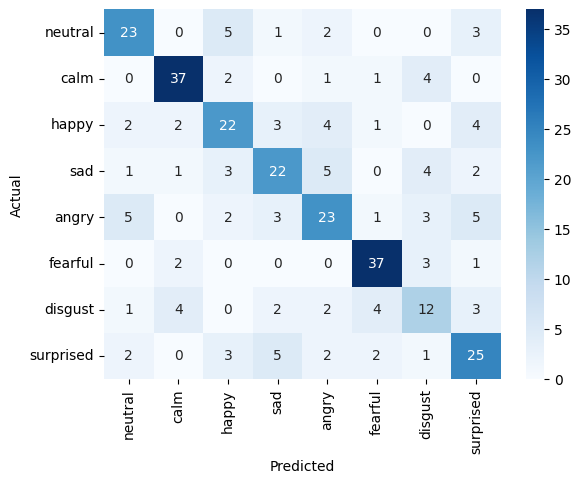

In [21]:
# Plot Confusion Matrix for MLP
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(emotions.values()), yticklabels=list(emotions.values()))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()